In [3]:
import pandas as pd
import numpy as np

In [26]:
## basic visualization
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("fivethirtyeight")

In [19]:
## for advanced visualization
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objects as go
from plotly import tools
init_notebook_mode(connected=True)
import plotly.figure_factory as ff

In [1]:
# for providing the path
import os
print(os.listdir('../input/'))

['alexa_reviews.tsv']


In [4]:
## read data
data = pd.read_csv('../input/alexa_reviews.tsv', delimiter='\t', quoting=3)

In [5]:
data.shape

(3150, 5)

In [6]:
data.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"""Sometimes while playing a game, you can answe...",1
3,5,31-Jul-18,Charcoal Fabric,"""I have had a lot of fun with this thing. My 4...",1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [8]:
## check for null data
data.isnull().any().any()   

False

In [9]:
## add length columns for the length of the reviews
data['length'] = data['verified_reviews'].apply(len)

In [12]:
## describe data according to rating
data.groupby('rating').describe()

feedback                                     length              \
          count mean  std  min  25%  50%  75%  max   count        mean   
rating                                                                   
1         161.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   161.0  195.658385   
2          96.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0    96.0  250.020833   
3         152.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0   152.0  208.098684   
4         455.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0   455.0  179.338462   
5        2286.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0  2286.0  109.006562   

                                                       
               std  min    25%    50%     75%     max  
rating                                                 
1       212.928219  1.0  36.00  120.0  284.00  1126.0  
2       270.179472  1.0  78.75  165.0  311.25  1688.0  
3       272.582517  1.0  54.00  131.0  286.00  1956.0  
4       216.415268  1.0  34.50  100.0  242.00  1362.0  
5       152.505019  1.0  27.00   65.0  136.00  2853.0

In [13]:
## describe data according to feedback
data.groupby('feedback').describe()

rating                                               length  \
           count      mean       std  min  25%  50%  75%  max   count   
feedback                                                                
0          257.0  1.373541  0.484688  1.0  1.0  1.0  2.0  2.0   257.0   
1         2893.0  4.737643  0.546544  3.0  5.0  5.0  5.0  5.0  2893.0   

                                                                   
                mean         std  min   25%    50%    75%     max  
feedback                                                           
0         215.964981  236.895519  1.0  53.0  137.0  291.0  1688.0  
1         125.274456  175.036515  1.0  29.0   70.0  155.0  2853.0

## visualization

In [24]:
ratings = data['rating'].value_counts()

label_rating = ratings.index
size_rating = ratings.values

colors = ['pink', 'lightblue', 'aqua', 'gold', 'crimson']

rating_piechart = go.Pie(labels = label_rating,
                         values = size_rating,
                         marker = dict(colors = colors),
                         name = 'Alexa', hole = 0.3)

df = [rating_piechart]

layout = go.Layout(
           title = 'Distribution of Ratings for Alexa')

fig = go.Figure(data=df, layout=layout)
py.iplot(fig)

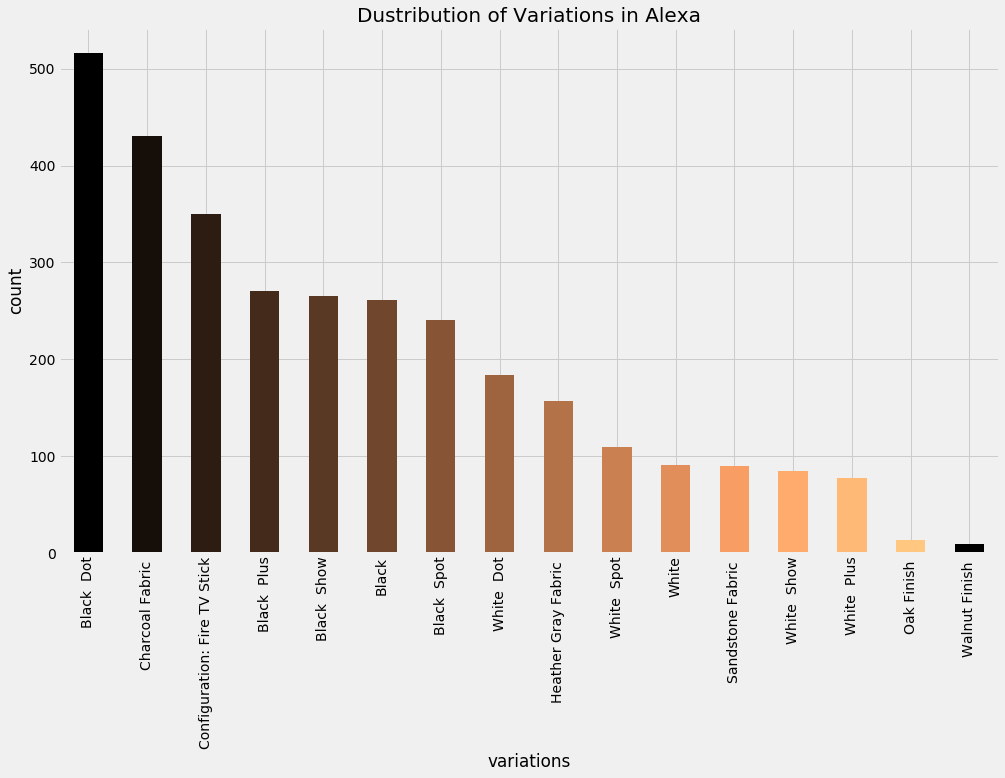

In [29]:
## variations distribution
color = plt.cm.copper(np.linspace(0,1,15))
data['variation'].value_counts().plot.bar(color=color, figsize=(15,9))
plt.title('Dustribution of Variations in Alexa', fontsize=20)
plt.xlabel('variations')
plt.ylabel('count')
plt.show()

array([[0.        , 0.        , 0.        , 1.        ],
       [0.08719721, 0.05514353, 0.03511765, 1.        ],
       [0.17439442, 0.11028706, 0.07023529, 1.        ],
       [0.26159163, 0.16543059, 0.10535294, 1.        ],
       [0.35363313, 0.22363765, 0.14242157, 1.        ],
       [0.44083035, 0.27878118, 0.17753922, 1.        ],
       [0.52802756, 0.33392471, 0.21265686, 1.        ],
       [0.62006906, 0.39213176, 0.24972549, 1.        ],
       [0.70726627, 0.44727529, 0.28484314, 1.        ],
       [0.79446348, 0.50241882, 0.31996078, 1.        ],
       [0.88166069, 0.55756235, 0.35507843, 1.        ],
       [0.97370219, 0.61576941, 0.39214706, 1.        ],
       [1.        , 0.67091294, 0.42726471, 1.        ],
       [1.        , 0.72605647, 0.46238235, 1.        ],
       [1.        , 0.7812    , 0.4975    , 1.        ]])